<a href="https://colab.research.google.com/github/s-c-soma/Deeplearning-CMPE-258/blob/main/Practice/Assignment3_Part_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

## Colab environment

In [1]:
!python --version

Python 3.7.10


In [2]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [3]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [4]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

Mon Mar 15 03:56:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Basic numerical computing

In [5]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [7]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [8]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [9]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [10]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [11]:
X.shape, x.shape

((3, 2), (2,))

In [12]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [13]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [14]:
X = np.random.rand(3, 2)
X

array([[0.64054137, 0.95852685],
       [0.13202844, 0.27043265],
       [0.87236455, 0.00423658]])

In [15]:
X > 0.5

array([[ True,  True],
       [False, False],
       [ True, False]])

In [16]:
X[X > 0.5] = 1
X

array([[1.        , 1.        ],
       [0.13202844, 0.27043265],
       [1.        , 0.00423658]])

## Basic plotting

In [17]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

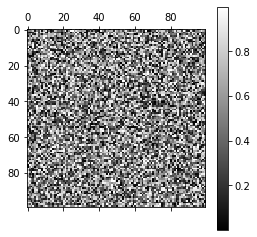

In [18]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

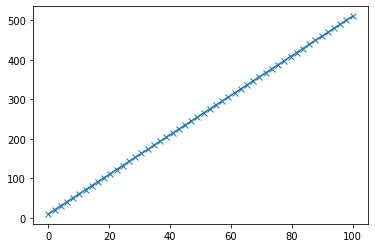

In [19]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


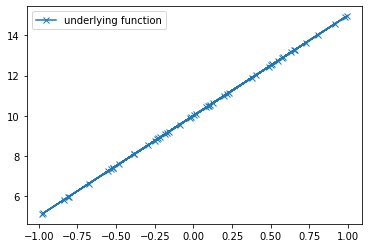

In [20]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

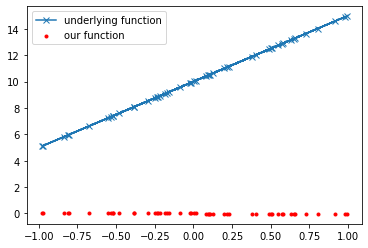

In [21]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [22]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 109.45365717365219


### Add back propagation

In [23]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [24]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

107.15651691729563
69.64153138320133


### Train using gradient descent!

Epoch 0, loss 113.85052403529295
Epoch 5, loss 16.639553825140595
Epoch 10, loss 4.297983300713988
Epoch 15, loss 1.8852155418525596
Epoch 20, loss 1.0090523940691098
Epoch 25, loss 0.5652977381530199
Epoch 30, loss 0.319553487347244
Epoch 35, loss 0.1809480782135959


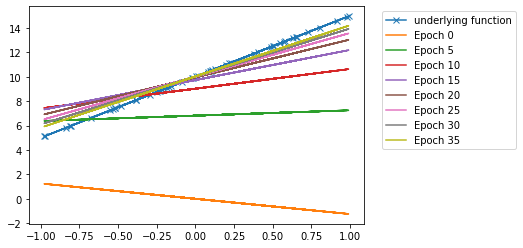

In [25]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


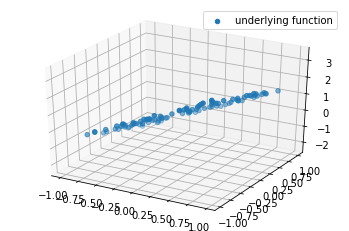

In [26]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

2.274510936334133


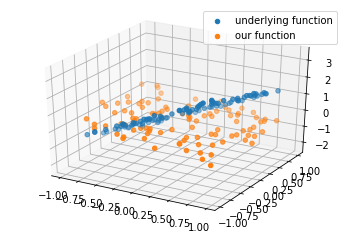

In [27]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 2.274510936334133
Epoch 1, loss 1.9492869164302973
Epoch 2, loss 1.688999724762774
Epoch 3, loss 1.4758020891534014
Epoch 4, loss 1.2976846904648938
Epoch 5, loss 1.1464361069888223
Epoch 6, loss 1.016331093213654
Epoch 7, loss 0.9032854381480391
Epoch 8, loss 0.8043099110314736
Epoch 9, loss 0.7171560979861237
Epoch 10, loss 0.6400855041030513
Epoch 11, loss 0.5717179712528545
Epoch 12, loss 0.5109312501513321
Epoch 13, loss 0.4567936686148623
Epoch 14, loss 0.40851830490695207
Epoch 15, loss 0.3654312157461346
Epoch 16, loss 0.3269489208894245
Epoch 17, loss 0.29256204621496545
Epoch 18, loss 0.2618231177506926
Epoch 19, loss 0.2343371994505034


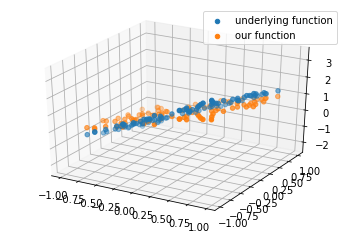

In [28]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


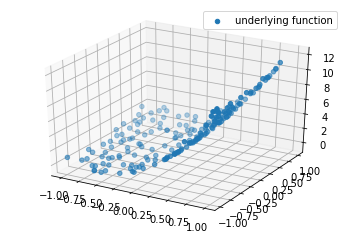

In [29]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 17.529876630576474
Epoch 1, loss 13.094214821012455
Epoch 2, loss 10.122542000722154
Epoch 3, loss 8.105359786372993
Epoch 4, loss 6.714419940075398
Epoch 5, loss 5.737687707448836
Epoch 6, loss 5.037719344873037
Epoch 7, loss 4.525013682851093
Epoch 8, loss 4.140941477707233
Epoch 9, loss 3.8468022359587097
Epoch 10, loss 3.6168022344374218
Epoch 11, loss 3.4335427998601125
Epoch 12, loss 3.285116410457042
Epoch 13, loss 3.1632333074695613
Epoch 14, loss 3.062009198956053
Epoch 15, loss 2.9771775855189615
Epoch 16, loss 2.9055752677665434
Epoch 17, loss 2.8448039886777305
Epoch 18, loss 2.793005967651956
Epoch 19, loss 2.74871335944653
Epoch 20, loss 2.7107459357656
Epoch 21, loss 2.678140426915064
Epoch 22, loss 2.650100821611004
Epoch 23, loss 2.6259626851306144
Epoch 24, loss 2.605166974437584
Epoch 25, loss 2.587240386570232
Epoch 26, loss 2.5717802823798057
Epoch 27, loss 2.558442879350332
Epoch 28, loss 2.5469338312904664
Epoch 29, loss 2.5370005902353285
Epoch 30,

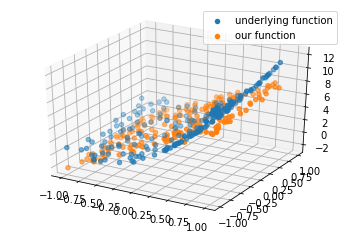

In [30]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [31]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

22.332227637027568


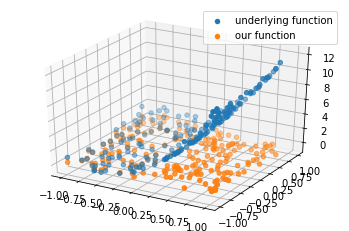

In [32]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [33]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

18.72918793955479
2.9717230496602496


Epoch 0, loss 2.9717230496602496
Epoch 1, loss 1.5758163722426377
Epoch 2, loss 1.1299642444178908
Epoch 3, loss 0.8889801643020797
Epoch 4, loss 0.7337598315386838
Epoch 5, loss 0.6216204361615775
Epoch 6, loss 0.5347762009132947
Epoch 7, loss 0.46408109079161747
Epoch 8, loss 0.4064664558718826
Epoch 9, loss 0.3593007700306999
Epoch 10, loss 0.32026282529394395
Epoch 11, loss 0.2878114074582379
Epoch 12, loss 0.260376472567306
Epoch 13, loss 0.23746635341685818
Epoch 14, loss 0.21833508762634282
Epoch 15, loss 0.202196880515341
Epoch 16, loss 0.1883657163921007
Epoch 17, loss 0.17653912970852054
Epoch 18, loss 0.16643416949021328
Epoch 19, loss 0.1578906457328136
Epoch 20, loss 0.15060544124109446
Epoch 21, loss 0.14427895449308994
Epoch 22, loss 0.1389704816417131
Epoch 23, loss 0.1344512376443019
Epoch 24, loss 0.13053027021748287
Epoch 25, loss 0.12713901505156738
Epoch 26, loss 0.12412659144379484
Epoch 27, loss 0.12152717099857274
Epoch 28, loss 0.11928240036760566
Epoch 29, los

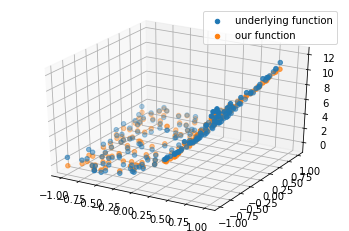

In [34]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

In [35]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(21.8117, grad_fn=<MseLossBackward>)


In [36]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(21.8117, grad_fn=<MseLossBackward>)
tensor(15.3821, grad_fn=<MseLossBackward>)


tensor(15.3821, grad_fn=<MseLossBackward>)
tensor(12.6352, grad_fn=<MseLossBackward>)
tensor(10.2399, grad_fn=<MseLossBackward>)
tensor(7.9746, grad_fn=<MseLossBackward>)
tensor(6.0697, grad_fn=<MseLossBackward>)
tensor(4.6855, grad_fn=<MseLossBackward>)
tensor(3.6854, grad_fn=<MseLossBackward>)
tensor(2.9258, grad_fn=<MseLossBackward>)
tensor(2.3318, grad_fn=<MseLossBackward>)
tensor(1.8562, grad_fn=<MseLossBackward>)
tensor(1.4897, grad_fn=<MseLossBackward>)
tensor(1.2129, grad_fn=<MseLossBackward>)
tensor(1.0033, grad_fn=<MseLossBackward>)
tensor(0.8415, grad_fn=<MseLossBackward>)
tensor(0.7193, grad_fn=<MseLossBackward>)
tensor(0.6267, grad_fn=<MseLossBackward>)
tensor(0.5557, grad_fn=<MseLossBackward>)
tensor(0.5012, grad_fn=<MseLossBackward>)
tensor(0.4580, grad_fn=<MseLossBackward>)
tensor(0.4232, grad_fn=<MseLossBackward>)
tensor(0.3944, grad_fn=<MseLossBackward>)
tensor(0.3697, grad_fn=<MseLossBackward>)
tensor(0.3483, grad_fn=<MseLossBackward>)
tensor(0.3286, grad_fn=<MseLoss

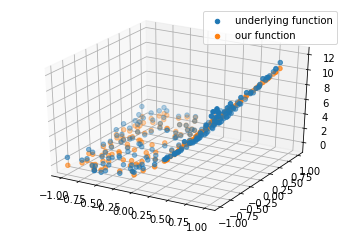

In [37]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 3s 2ms/step - loss: 13.7664
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.2824
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 1.2886
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.4473
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3587
Epoc

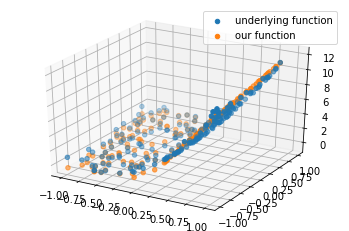

In [38]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))